# Nature of the Data

<p>Data here are composed of 28 indicators repeated for 28 consecutive time frames, creating a one-channel (gray-scale) image. The used indicators are:</p>
<h4>Yield</h4>
<div>
 \begin{equation}Yield = \frac{Close - Open}{Open}\end{equation}
</div>
<h4>Percentage Volume</h4>
<div>
 \begin{equation} PercentageVolume = 10^4\frac{High - Low}{Volume}
 \end{equation}
</div>
<h4> Simple Moving Averages</h4>
<div>
 \begin{equation} SMA(Close, n) = \frac 1n \sum_{i=0}^n Close_{n-i},\quad n=\{6,20,50,100\}
 \end{equation}
</div>
<h4> Exponential Moving Averages</h4>
<div>
 \begin{equation} EMA(Close, n) = \alpha\times Close_{i} + (1-\alpha)\times EMA_{i-1}(Close,n), \quad \alpha = \frac 2{n+1},\quad n=\{6,20,50,100\}
 \end{equation}
</div>
<h4> Weighted Moving Averages</h4>
<div>
 \begin{equation} WMA(Close, n) = \frac{\sum _ {i=0}^{n-1} i \times Close_{i}}{\frac{n(n-1)}2}, \quad n=\{6,20,50,100\}
 \end{equation}
</div>
<h4> Hull Moving Averages</h4>
<div>
 \begin{equation} HMA(Close, n) = WMA((2WMA(Close,\frac n 2) - WMA(Close,n)), \sqrt{n}), \quad n=\{6,20,50,100\}
 \end{equation}
</div>
<h4> Moving Average Convergence/Divergence</h4>
<div>
\begin{equation} MACD = EMA(Close, 12) - EMA(Close, 26) \end{equation}
</div>
<h4> Commodity Channel Index</h4>
<div>
\begin{equation} CCI = \frac{TypicalPrice - SMA(TypicalPrice,20)}{0.015 \times AvgDev}, \quad TypicalPrice = \frac{High + Low + Close}3 \end{equation}
</div>
<h4> Stochastic Oscillator</h4>
<div>
\begin{equation} StochasticOscillator = 100\frac{Close - H14}{H14 - L14} \end{equation}
</div>
<h4> Relative Strength Index</h4>
<div>
\begin{equation} RSI(n) = 100 - \frac{100}{1+RS}, \quad RS = \frac U D, \quad n=14 \end{equation}
<p>where $U,D$ are respectively the average of the differences $ Close - Open$ of the last n Bullish/Bearish bars</p>
</div>
<h4> Rate of Change</h4>
<div>
\begin{equation} ROC(n) = 100 \frac{Close_i - Close_{i-n}}{Close_{i-n}}, \quad n = 14 \end{equation}
</div>
<h4> Percentage Price Oscillator</h4>
<div>
\begin{equation} PPO = 100 \frac{EMA(Close, 12) - EMA(Close, 26}{EMA(Close,26)} \end{equation}
</div>
<h4> Know Sure Thing</h4>
<div>
\begin{equation} KST = SMA(RCMA_1 + 2RCMA_2 + 3RCMA_3 +4RCMA_4, 9)\end{equation}
\begin{equation} RCMA_1 = SMA(ROC(10), 10), ~RCMA_2 = SMA(ROC(15), 10), ~ RCMA_3 = SMA(ROC(20), 10),~ RCMA_4 = SMA(ROC(30), 15) \end{equation}
</div>
<h4> Bollinger Bands (Middle, Up and Down)</h4>
<div>
\begin{equation} BOLM = SMA(TypicalPrice, 20) \end{equation}
\begin{equation} BOLU = SMA(TypicalPrice, 20)+ 2\sigma_{20}(TypicalPrice) \end{equation}
\begin{equation} BOLD = SMA(TypicalPrice, 20)- 2\sigma_{20}(TypicalPrice) \end{equation}
<p>where $\sigma_{20}(TypicalPrice)$ is the standard deviation of the last 20 Typical Prices</p>
</div>

<div>The code below reports an example of how data for a specific currency pair has been generated, using the functions from the <strong>utils.py</strong> and <strong>IndicatorsFunction.py</strong> modules. The <strong>generateData(filepath, columns, index, indicators)</div> allows to compute the listed indicators, starting from a raw csv file, containing Open, Close, High, Low prices and Volume features.

# Feature Engineering

<div> In this section some statistics will be retrieved to more deeply investigate the nature of the features.</div>

In [1]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
          'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header=0)
data.head(5)

,Date,Open,High,Low,Close,Volume,Yield,PercentageVolume,SMA6,EMA6,...,MACD,CCI,Stochastic Oscillator,RSI,ROC,PPO,KST,BOLU,BOLD,BOLM
108,2007-05-07 00:00,1.35920,1.36255,1.35897,1.35957,670412,0.000272,0.000053,1.358705,1.359373,...,0.004475,78.351057,41.531165,52.202416,-0.277258,0.330289,17.205950,1.368192,1.351420,1.359806
109,2007-05-08 00:00,1.35962,1.36202,1.35155,1.35377,673355,-0.004303,0.000155,1.357632,1.357772,...,0.003709,-26.340773,13.333333,39.059614,-0.742723,0.273818,16.310808,1.368203,1.351431,1.359817
110,2007-05-09 00:00,1.35379,1.35641,1.35187,1.35326,659615,-0.000391,0.000069,1.356630,1.356483,...,0.003027,-64.706835,10.270270,38.086730,-0.437022,0.223454,15.282046,1.368197,1.351425,1.359811
111,2007-05-10 00:00,1.35325,1.35624,1.34656,1.34757,674149,-0.004197,0.000144,1.355378,1.353936,...,0.002004,-111.522459,4.667283,28.839512,-1.291386,0.147980,14.108170,1.367885,1.351113,1.359499
112,2007-05-11 00:00,1.34760,1.35305,1.34628,1.35222,615659,0.003428,0.000110,1.354260,1.353446,...,0.001550,-81.715962,27.098540,42.096151,-0.743568,0.114500,12.880034,1.367427,1.350655,1.359041


In [2]:
toRemove = ['Volume', 'Date','High','Low','Open','Close']
close = data['Close']
df = selectData(data,toRemove)
normDf = normalizeData(df)
normClose = normalizeData(close)

## Features Distributions

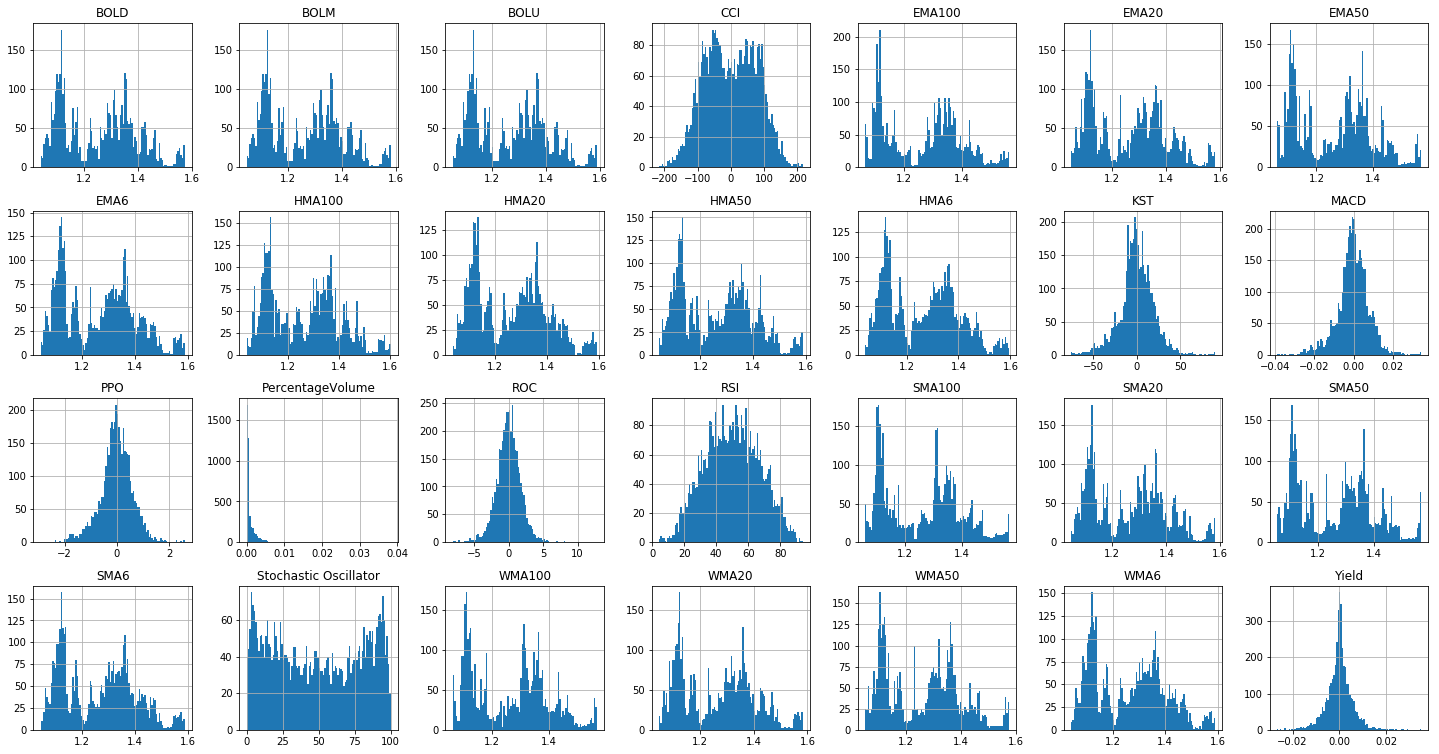

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(25,13), layout=(4,7), bins=100)
plt.show()

## Correlations

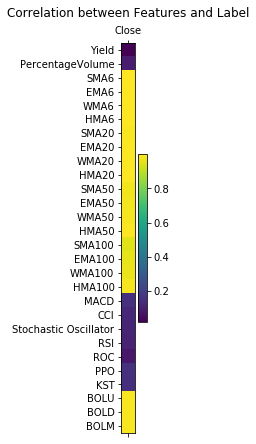

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
corrFeaturesLabel = np.array(normDf.corrwith(normClose, axis= 0))
corrFeaturesLabel = np.reshape(corrFeaturesLabel, (corrFeaturesLabel.shape[0],1))
plt.figure(figsize=(1,7))
plt.matshow(corrFeaturesLabel, fignum=1)
plt.colorbar()
plt.yticks(range(len(normDf.columns)),normDf.columns,fontsize=10)
plt.xticks([0],['Close'],fontsize=10)
plt.title("Correlation between Features and Label")
plt.show()

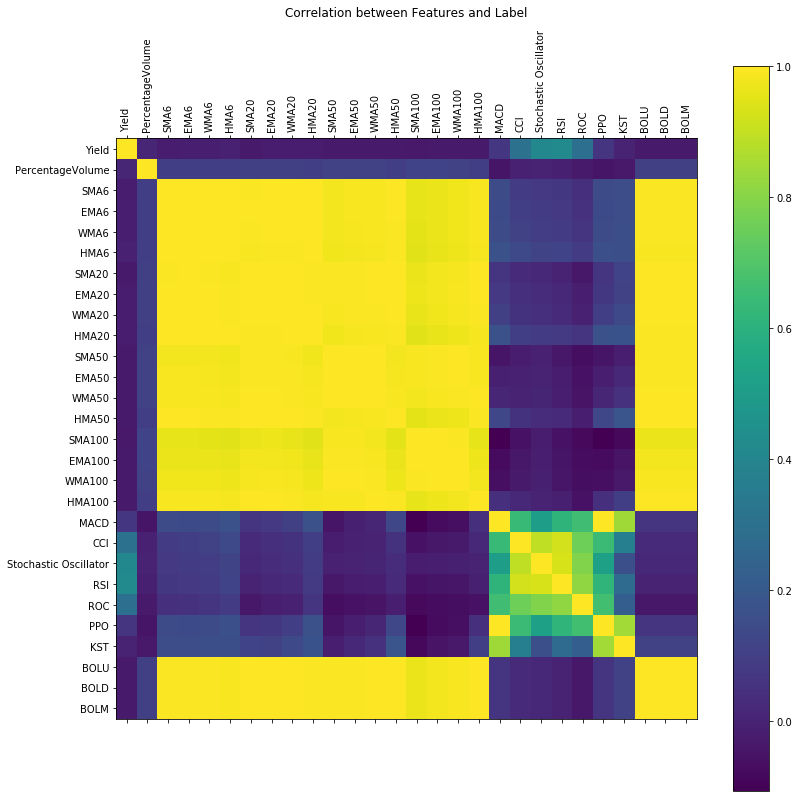

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,13))
plt.matshow(normDf.corr(), fignum=1)
plt.colorbar()
plt.yticks(range(len(normDf.columns)),normDf.columns,fontsize=10)
plt.xticks(range(len(normDf.columns)),normDf.columns,fontsize=10,rotation=90)
plt.title("Correlation between Features and Label", y=1.2)
plt.show()

In [8]:
corr = normDf.corr()
corr.style.background_gradient(cmap='coolwarm')

,Yield,PercentageVolume,SMA6,EMA6,WMA6,HMA6,SMA20,EMA20,WMA20,HMA20,SMA50,EMA50,WMA50,HMA50,SMA100,EMA100,WMA100,HMA100,MACD,CCI,Stochastic Oscillator,RSI,ROC,PPO,KST,BOLU,BOLD,BOLM
Yield,1,0.0130446,-0.0197285,-0.0137313,-0.0138662,-0.00445038,-0.025681,-0.0234359,-0.0232624,-0.0226411,-0.0270409,-0.0266629,-0.0263566,-0.0265687,-0.0293701,-0.028715,-0.0275354,-0.0271168,0.06669,0.30561,0.408342,0.424048,0.295927,0.0652831,-0.000493917,-0.026598,-0.026598,-0.026598
PercentageVolume,0.0130446,1,0.0996006,0.0999195,0.0993572,0.0988282,0.103644,0.10336,0.101959,0.098282,0.108618,0.109304,0.10606,0.100228,0.117876,0.118045,0.112179,0.100079,-0.0434268,-0.00409283,-0.00285216,-0.0104327,-0.0263648,-0.0438495,-0.0296325,0.103815,0.103815,0.103815
SMA6,-0.0197285,0.0996006,1,0.999861,0.999796,0.998023,0.995467,0.997144,0.998354,0.999503,0.981648,0.987226,0.990719,0.99657,0.957416,0.968672,0.976755,0.989884,0.145643,0.0919595,0.0791248,0.0708902,0.0480185,0.144142,0.156224,0.995137,0.995137,0.995137
EMA6,-0.0137313,0.0999195,0.999861,1,0.999895,0.998652,0.995727,0.997344,0.998464,0.99916,0.98214,0.987622,0.991095,0.996572,0.95796,0.969165,0.977248,0.990215,0.143267,0.0969508,0.0837829,0.0760162,0.0492006,0.141749,0.154032,0.995395,0.995395,0.995395
WMA6,-0.0138662,0.0993572,0.999796,0.999895,1,0.999074,0.994455,0.996364,0.997617,0.999277,0.980408,0.986093,0.989606,0.995599,0.956044,0.967364,0.975498,0.988683,0.152565,0.106371,0.0932415,0.0858632,0.0612217,0.151017,0.157035,0.994086,0.994086,0.994086
HMA6,-0.00445038,0.0988282,0.998023,0.998652,0.999074,1,0.991149,0.99351,0.994838,0.99744,0.976684,0.982565,0.986112,0.992348,0.95209,0.963518,0.971744,0.985012,0.165919,0.136001,0.121649,0.116139,0.0875627,0.164275,0.158316,0.990702,0.990702,0.990702
SMA20,-0.025681,0.103644,0.995467,0.995727,0.994455,0.991149,1,0.999573,0.999162,0.992704,0.991392,0.994873,0.997832,0.997459,0.969157,0.979146,0.986726,0.996779,0.0660882,0.030152,0.0178185,0.00483635,-0.0336093,0.0648648,0.115065,0.99999,0.99999,0.99999
EMA20,-0.0234359,0.10336,0.997144,0.997344,0.996364,0.99351,0.999573,1,0.999553,0.994887,0.991887,0.99536,0.997904,0.99686,0.970429,0.980116,0.987538,0.995865,0.075164,0.0422553,0.0340519,0.0204083,-0.0125313,0.0739382,0.109053,0.999509,0.999509,0.999509
WMA20,-0.0232624,0.101959,0.998354,0.998464,0.997617,0.994838,0.999162,0.999553,1,0.9967,0.987835,0.992357,0.995614,0.998517,0.964581,0.975218,0.983045,0.994823,0.10202,0.0542325,0.0406625,0.0305748,-0.00305338,0.100666,0.137757,0.999008,0.999008,0.999008
HMA20,-0.0226411,0.098282,0.999503,0.99916,0.999277,0.99744,0.992704,0.994887,0.9967,1,0.977096,0.983363,0.987045,0.995203,0.952273,0.963933,0.972142,0.986443,0.167871,0.100415,0.0873419,0.0803547,0.0639437,0.166309,0.171884,0.992292,0.992292,0.992292


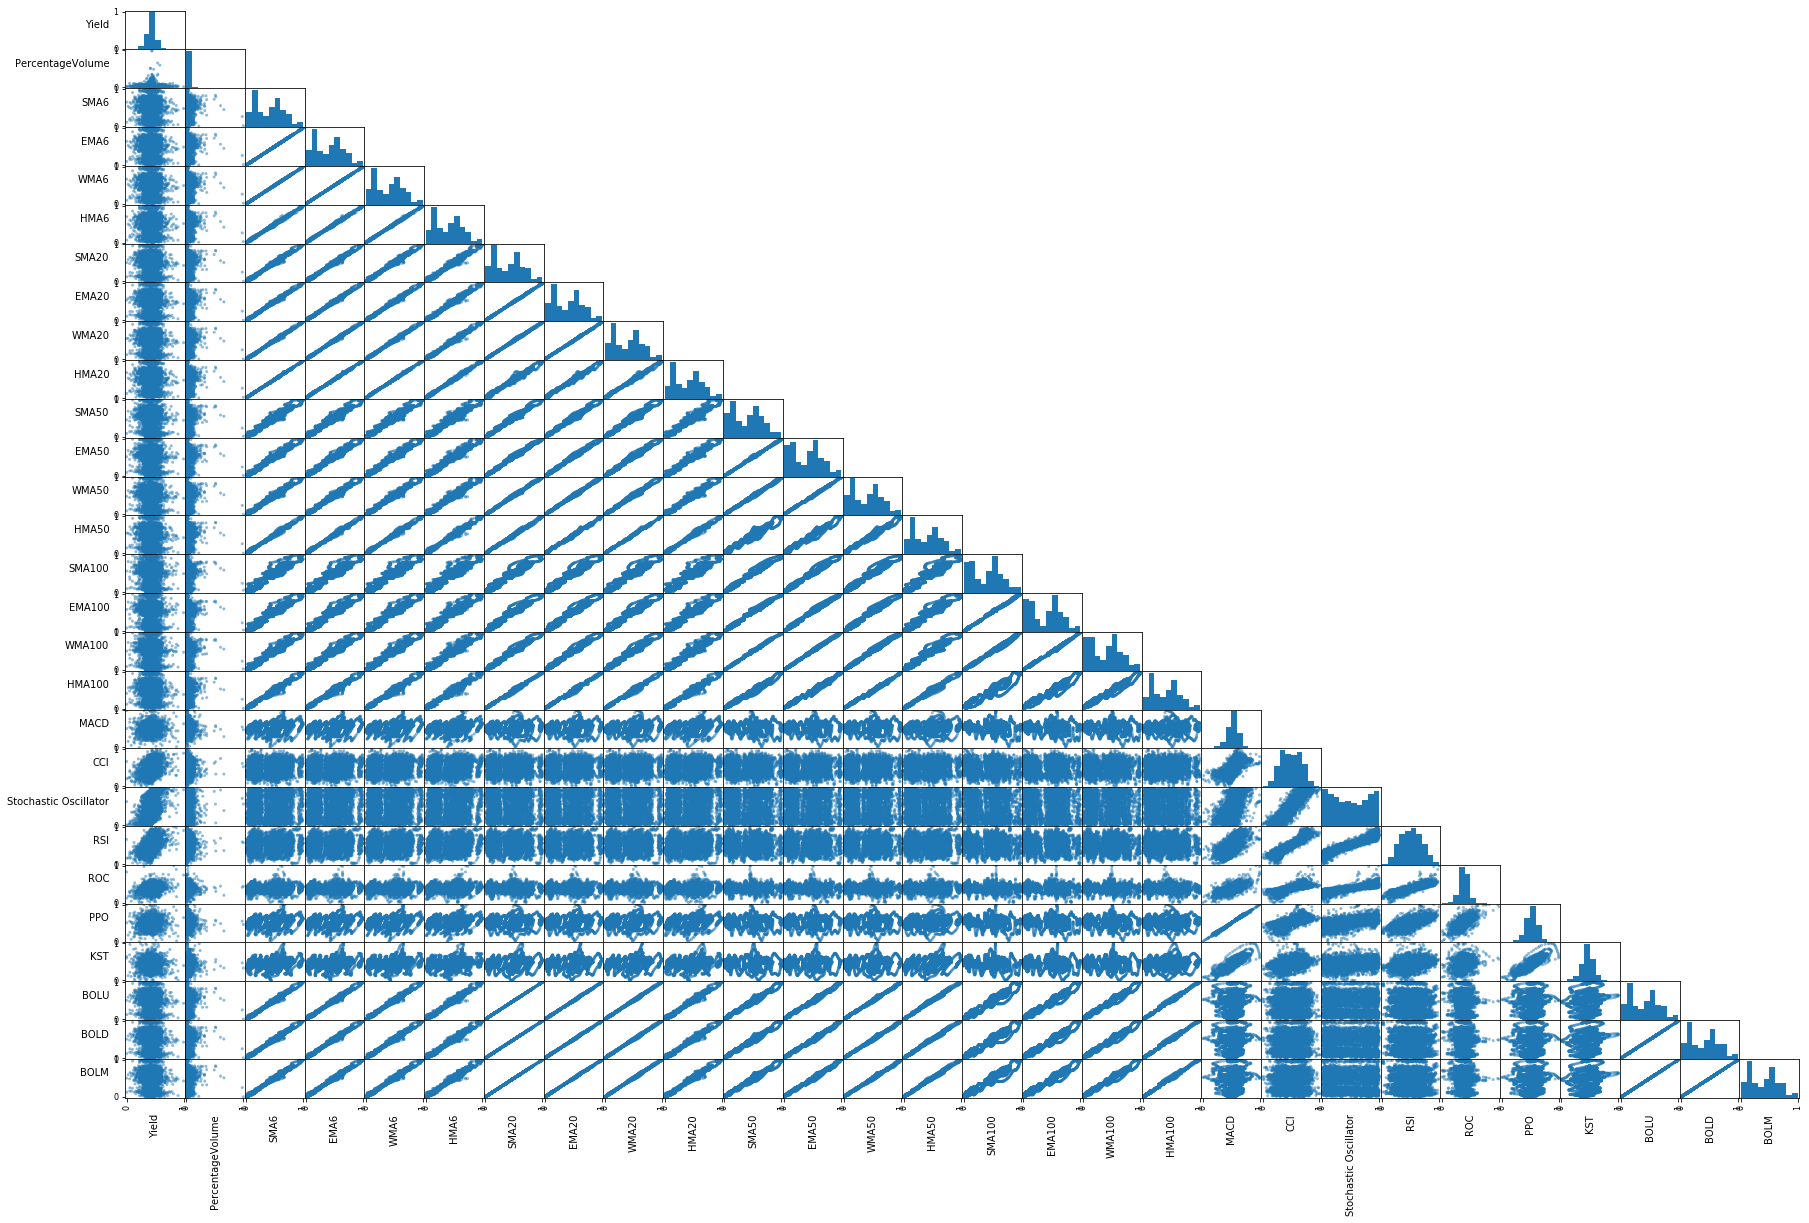

In [22]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(normDf, figsize=(30,20))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
plt.show()

## Features Ranges

In [11]:
df.describe()

,Yield,PercentageVolume,SMA6,EMA6,WMA6,HMA6,SMA20,EMA20,WMA20,HMA20,...,MACD,CCI,Stochastic Oscillator,RSI,ROC,PPO,KST,BOLU,BOLD,BOLM
count,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,...,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000
mean,0.000013,0.000996,1.262886,1.262887,1.262851,1.262782,1.263192,1.263185,1.263054,1.262805,...,-0.000289,-0.494021,49.125993,49.883487,-0.021394,-0.026235,-0.365808,1.271608,1.254836,1.263222
std,0.005466,0.001723,0.134420,0.134330,0.134445,0.134667,0.133997,0.133673,0.134104,0.134850,...,0.008105,77.633071,30.906740,16.968410,1.811851,0.621883,19.758199,0.133963,0.133963,0.133963
min,-0.026624,0.000000,1.042187,1.043997,1.041784,1.039315,1.046509,1.049516,1.046267,1.037456,...,-0.039021,-216.818029,0.000000,4.098191,-8.121461,-2.914867,-75.801828,1.055009,1.038237,1.046623
25%,-0.002596,0.000278,1.129803,1.129269,1.129824,1.130558,1.127822,1.127381,1.128006,1.131160,...,-0.004266,-61.630473,20.493125,37.156596,-1.056724,-0.345972,-10.332116,1.136112,1.119339,1.127725
50%,0.000095,0.000462,1.274220,1.274902,1.274270,1.272535,1.278639,1.280047,1.276677,1.271312,...,-0.000112,-1.199876,48.271799,49.999177,-0.013602,-0.009110,-0.526748,1.287455,1.270683,1.279069
75%,0.002612,0.000980,1.362567,1.362745,1.362770,1.362815,1.362456,1.363093,1.362588,1.362679,...,0.004441,62.628979,78.601271,62.485381,1.037170,0.347986,11.437061,1.370724,1.353952,1.362338
max,0.034954,0.038251,1.589047,1.588542,1.589497,1.594462,1.580494,1.580024,1.583246,1.591144,...,0.034426,216.449052,100.000000,94.160581,12.780866,2.580451,89.998344,1.588927,1.572155,1.580541


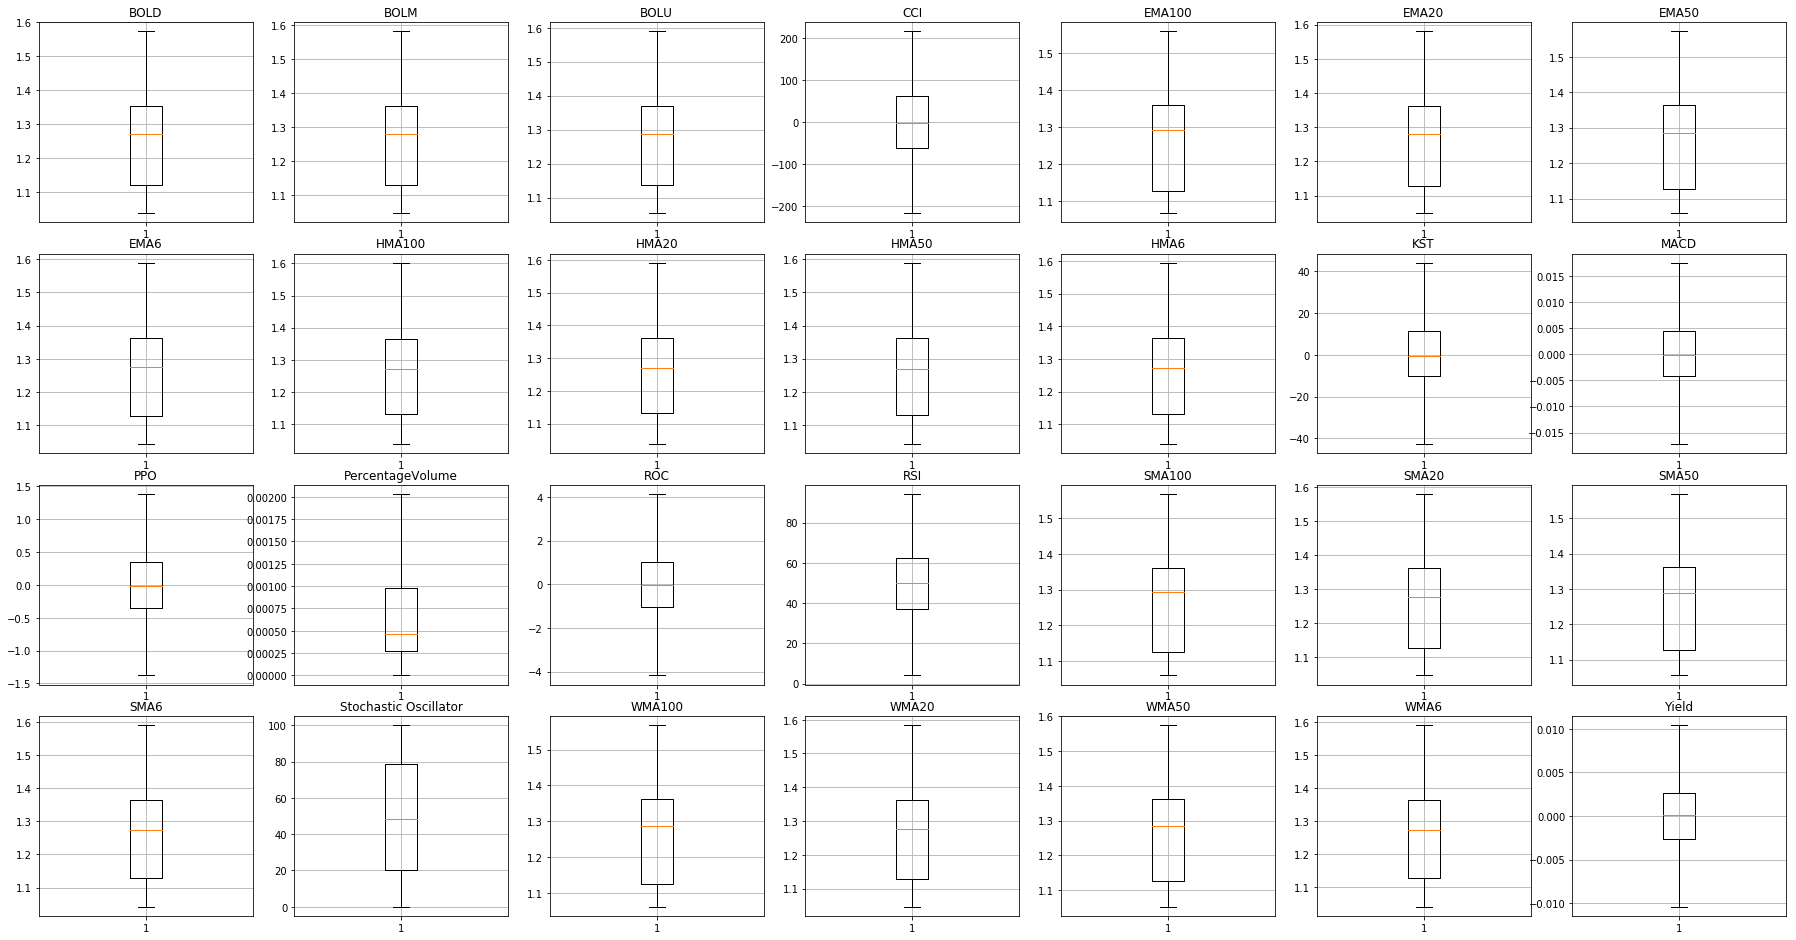

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4,7,figsize=(25,13))
fig.tight_layout()
axes = axes.flatten()
for i, col in enumerate(list(sorted(df.columns))):
    axes[i].boxplot(df[col], showfliers = False)
    axes[i].set_title(col)
    axes[i].grid()
plt.show()

## Feature Selection Metrics

In [10]:
from sklearn.feature_selection import mutual_info_regression

feature_scores = mutual_info_regression(df, close, random_state=0)
for score, f_name in sorted(zip(feature_scores, df.columns), reverse=True):
        print(f_name, score)

HMA6 3.3214133772887497
WMA6 2.8967585033615104
EMA6 2.8144452671226907
SMA6 2.6276077913391926
HMA20 2.478438626578584
WMA20 2.2765053892611538
EMA20 2.221622098422853
HMA50 2.114946471249824
SMA20 2.0821901942635708
BOLM 2.070349966549997
BOLD 2.070342800620133
BOLU 2.070303251858511
WMA50 2.00239007914175
HMA100 1.96610176742966
EMA50 1.9002447055696794
SMA50 1.8484709893760911
WMA100 1.804679504219334
EMA100 1.7597461936923837
SMA100 1.7348533465159006
MACD 0.43153847117994815
PPO 0.4174536936926456
KST 0.3958697685649879
PercentageVolume 0.18406935729055363
RSI 0.17387056951815172
ROC 0.15290292966649766
CCI 0.13341131465067857
Stochastic Oscillator 0.09599769353797516
Yield 0.013153987736083117


<h1> Deep Learning Models </h1>

<div>Deep Learning models represent a powerful solution for problems characterized by non-linearity. This section will present the following models:
<ol>
    <li>Convolutional Neural Network: the structure of this network is defined in the module <strong>CNN.py</strong></li>
    <li>Recurrent Neural Network - Long Short-Term Memory: the structure of this network is defined in the module <strong>RNN.py</strong></li>
    <li>Temporal Convlutional Neural Network: the structure of this network is deined in the module <strong>TCN.py</strong></li>
</ol>
The three networks above have been entirely defined through the TensorFlow library and presents a common partiton of the methods:
<ul>
    <li><strong>run(train_X, valid_X, test_X, train_Y, valid_Y, test_Y, epochs, batch_size, **params)</strong>: it represents the main method, which instatiate the network through the internal method <strong>create_net</strong> and allows to train the network, by evaluating the loss function on the training and validation data. Finally, it allows to save the model if its performances on the test data are the best achieved up to that moment
    <li><strong>runLoadedModel(test_X, test_Y)</strong>: it represents the method to directly evaluate the performance of the network over test data. Internally, it loads the structure and the weights of the best model saved after the previous training procedures. Finally, it returns the predicitons and displays the metrics the network reached on the passed data
</ul>

</div>

# CNN Implementation

## Data Generation

In [1]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [2]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size = 0.1,shuffle = False)

## Instance of the Convolutional Neural Network

Training from scratch the network

In [ ]:
from Scripts.CNN import *
predictedPrices, mse, corr, dtw, fastdtw = run(train_X,valid_X,test_X,
                                               train_Y, valid_Y,test_Y, 
                                               epochs=200, batch_size=32, 
                                               filters=[32,64,128],kernel=7, lr=0.005, dataset='EURUSD')

Loading the pre-trained model from the directory Models/CNN

In [4]:
from Scripts.CNN import *
predictedPrices, mse, corr, dtw, fastdtw = runLoadedModel(test_X, np.array(test_Y),'EURUSD')

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
activation_40 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        100416    
_________________________________________________________________
activation_41 (Activation)   (None, 14, 14, 64)      

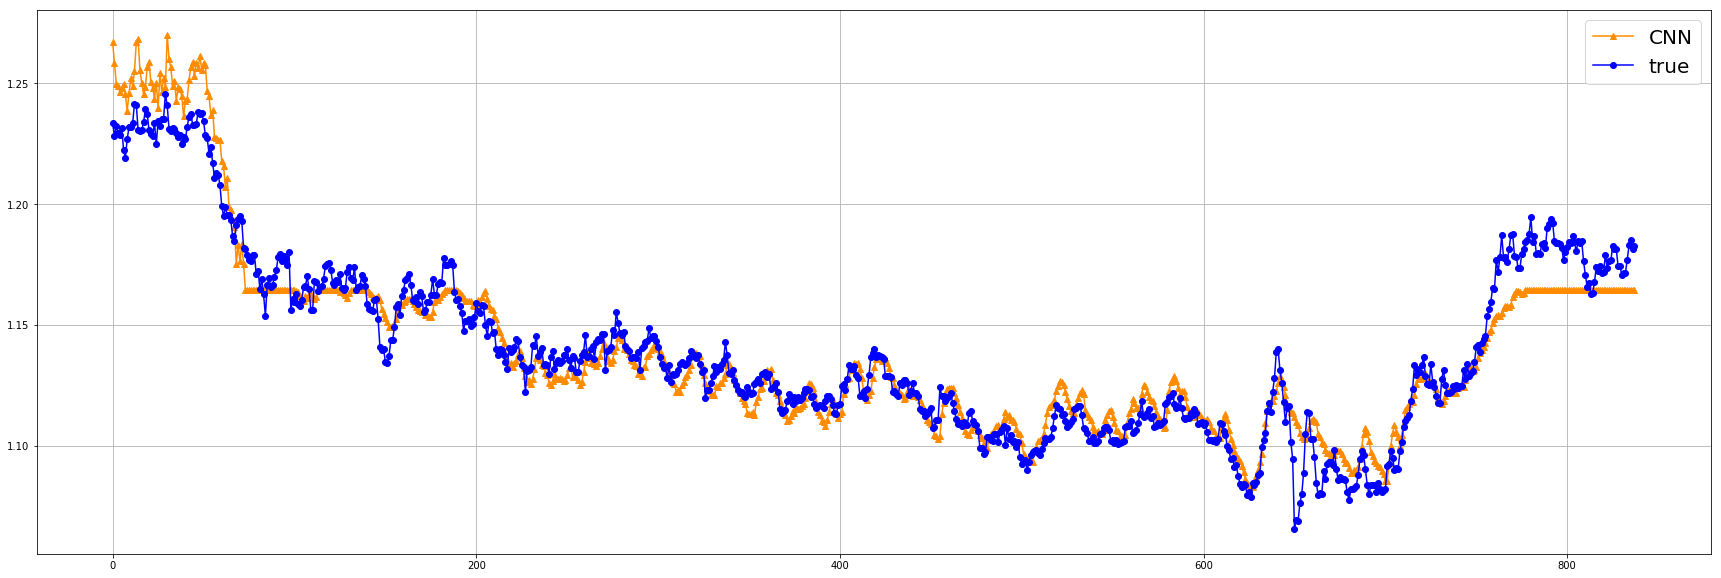

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[30,10])
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, label = 'CNN', color = 'darkorange', marker = '^')
plt.plot(range(len(test_Y)),test_Y, label = 'true', color = 'blue', marker = 'o')
plt.legend(fontsize=20)
plt.show()

# Recurrent Neural Network - Long Short Term Memory Implementation

## Data Generation

In [7]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [8]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets 

Training and Test Datasets are obtained with the 80-20 Pareto Rule

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size = 0.1,shuffle = False)

In [10]:
train_X = train_X.reshape(train_X.shape[0],28,28).astype(np.float32)
valid_X = valid_X.reshape(valid_X.shape[0],28,28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28,28).astype(np.float32)

## Instance of the Recurrent Neural Network

Training from scratch the network

In [ ]:
from Scripts.RNN import *
predictedPrices, mse, corr, dtw, fastdtw = run(train_X, valid_X, test_X,
                                               train_Y, valid_Y,test_Y,
                                               epochs=200, batch_size=32,
                                               learning_rate=0.01, nb_layers=2, sizeCell=128, num_features=28, dataset='EURUSD')

Loading the pre-trained model from the directory Models/RNN

In [11]:
from Scripts.RNN import *
predictedPrices, mse, corr, dtw, fastdtw = runLoadedModel(test_X, np.array(test_Y), 'EURUSD')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 28, 128)           80384     
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 129       
Total params: 212,097
Trainable params: 212,097
Non-trainable params: 0
_________________________________________________________________
None
MSE: 2.080817e-05
CORR: 0.993
DTW: 0.938
FAST DTW: 0.914


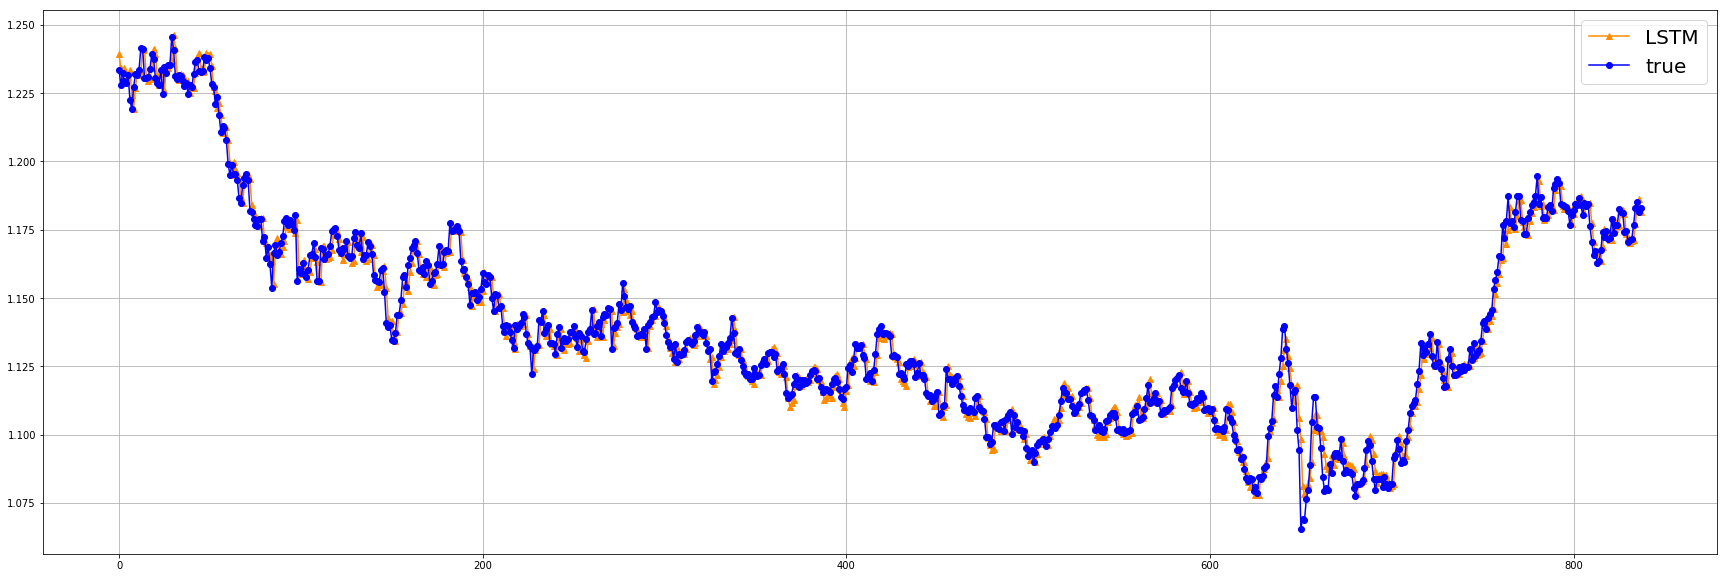

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=[30,10])
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, label = 'LSTM', color = 'darkorange', marker = '^')
plt.plot(range(len(test_Y)),test_Y, label = 'true', color = 'blue', marker = 'o')
plt.legend(fontsize=20)
plt.show()

# TCN Implementation

## Data Generation

In [14]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)

In [15]:
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [16]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets 

In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size = 0.1,shuffle = False)

In [18]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
valid_X = valid_X.reshape(valid_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

## Instance of the Temporal Convolutional Neural Network

Training from scratch the network

In [ ]:
from Scripts.TCN import *
predictedPrices, mse, corr, dtw, fastdtw = run(train_X, valid_X, test_X,
                                               train_Y, valid_Y, test_Y,
                                               epochs=200, batch_size=32,
                                               lr=0.01, num_channel=7, nb_filter=100, dataset='EURUSD')

Loading the pre-trained model from the directory Models/CNN

In [19]:
from Scripts.TCN import *
predictedPrices, mse, corr, dtw, fastdtw = runLoadedModel(test_X, np.array(test_Y), 'EURUSD')

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 784, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_90 (Conv1D)              (None, 784, 100)     400         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_84 (BatchNo (None, 784, 100)     400         conv1d_90[0][0]                  
__________________________________________________________________________________________________
activation_126 (Activation)     (None, 784, 100)     0           batch_normalization_84[0][0]     
______________________________________________________________________________________

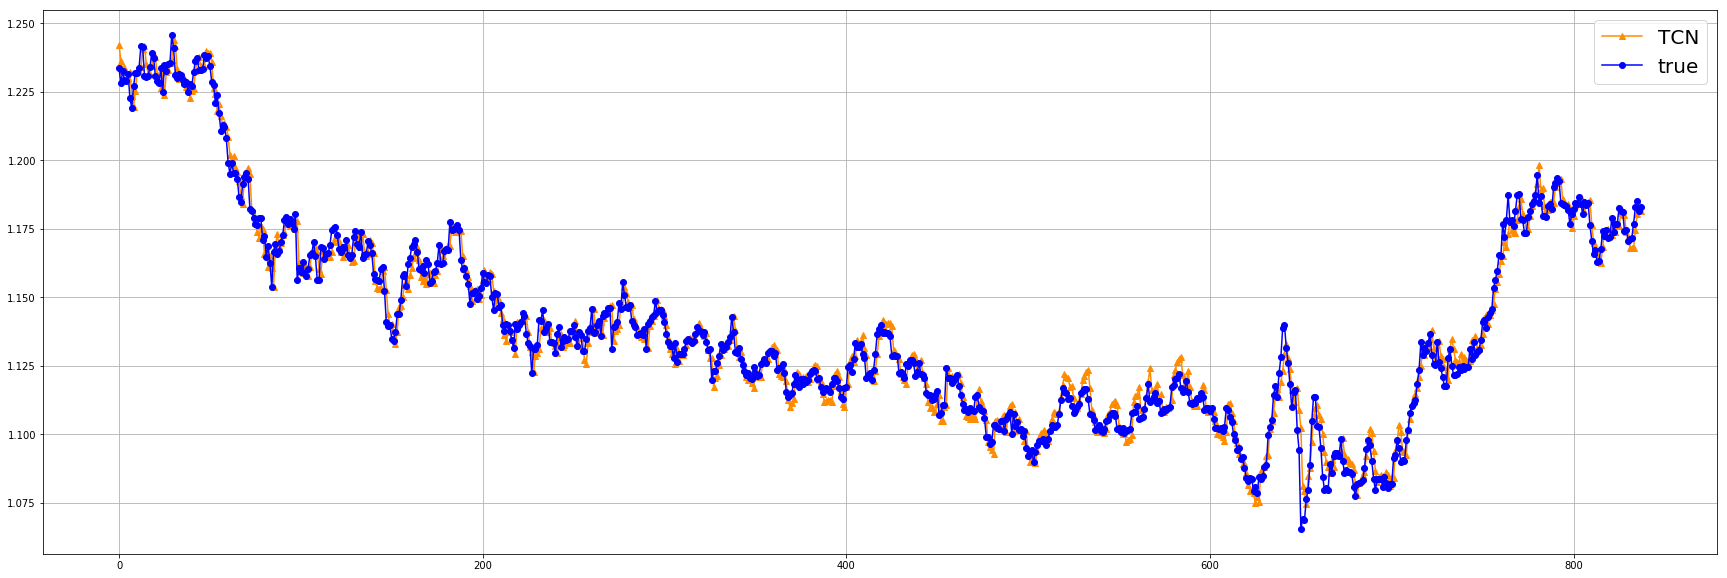

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[30,10])
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, label = 'TCN', color = 'darkorange', marker = '^')
plt.plot(range(len(test_Y)),test_Y, label = 'true', color = 'blue', marker = 'o')
plt.legend(fontsize=20)
plt.show()

<h1>Machine Learning Models</h1>

<div>The ML Models included in this section are well-known and refined algorithms. For this scope the <strong>scikit-learn</strong> library was used. The models are:
    <ol>
        <li><strong>Linear Regression</strong> and <strong>Polynomial Features</strong> for higher-order models</li>
        <li><strong>Support Vector Regression</strong>, cross-validated with the <strong>GridSearchCV</strong> functionality </li>
        <li><strong>Random Forest Regression</strong>, cross-validated with the <strong>GridSearchCV</strong> functionality </li>
        <li><strong>K-Nearest Neighbours Regression</strong>, cross-validated with the <strong>GridSearchCV</strong> functionality </li>
        <li><strong>Bayesian Ridge Regression</strong>, cross-validated with the <strong>GridSearchCV</strong> functionality </li>
    </ol>
</div>      

# Support Vector Regressor Implementation

## Data Generation

In [22]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [23]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets

In [24]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [25]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

## Instance of the SVR

In [26]:
from sklearn.svm import SVR
from Scripts.DTW import *
from Scripts.FastDTW import *
import json

with open("Models/ML/MLModels.json","r") as f:
    params = json.load(f)["Support Vector Regression"]["EURUSD"]
svr = SVR(**params)
predictedPrices = svr.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

MSE: 1.359575e-03
CORR: 0.972
DTW: 27.496
DTW: 15.016


<p>Alternatively it is possible to load the pre-trained model fromt the directory Models/ML/</p>

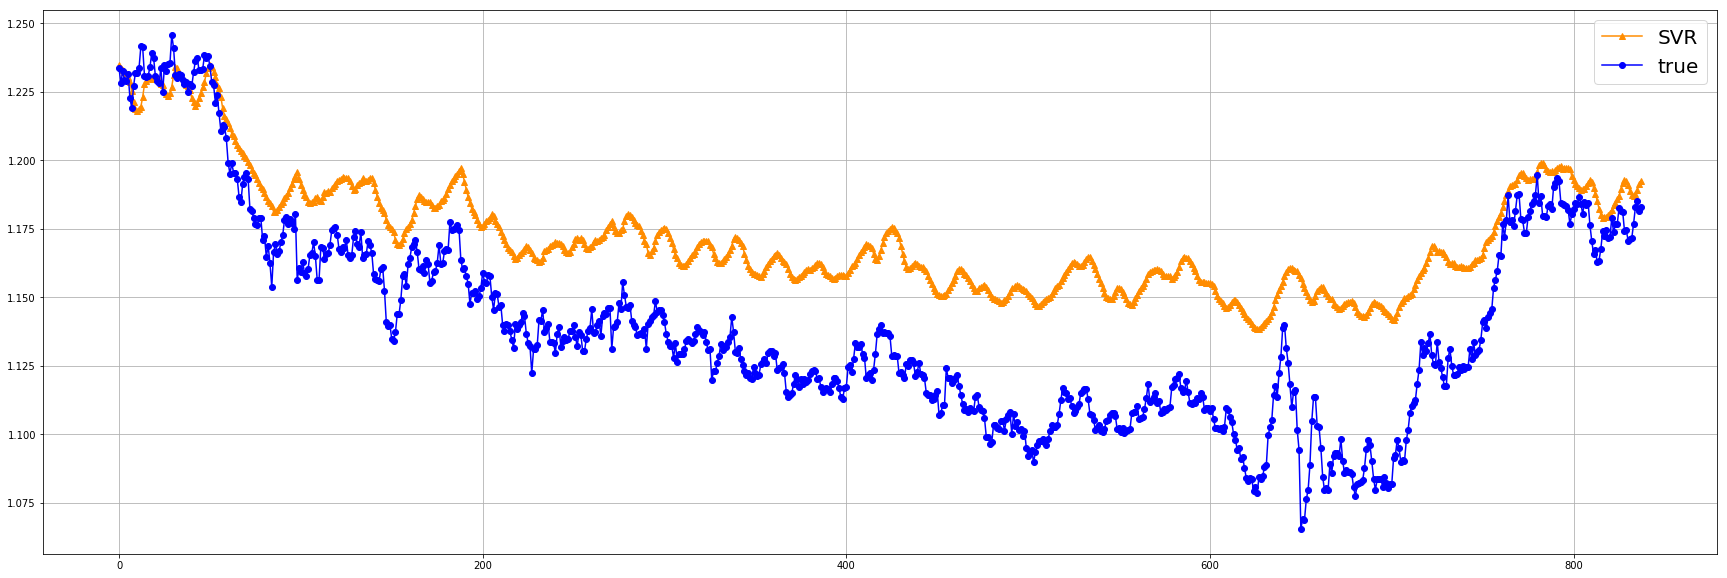

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'SVR')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

# Linear Regression and Polynomial Features

## Data Generation

In [29]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [30]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets

In [31]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [32]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

## Linear Regression Instance

In [33]:
from sklearn.linear_model import LinearRegression
from Scripts.DTW import *
from Scripts.FastDTW import *
import json

with open("Models/ML/MLModels.json","r") as f:
    params = json.load(f)["Linear Regression"]["EURUSD"]
lr = LinearRegression(**params)
predictedPrices = lr.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

MSE: 2.058352e-05
CORR: 0.993
DTW: 1.132
DTW: 1.129


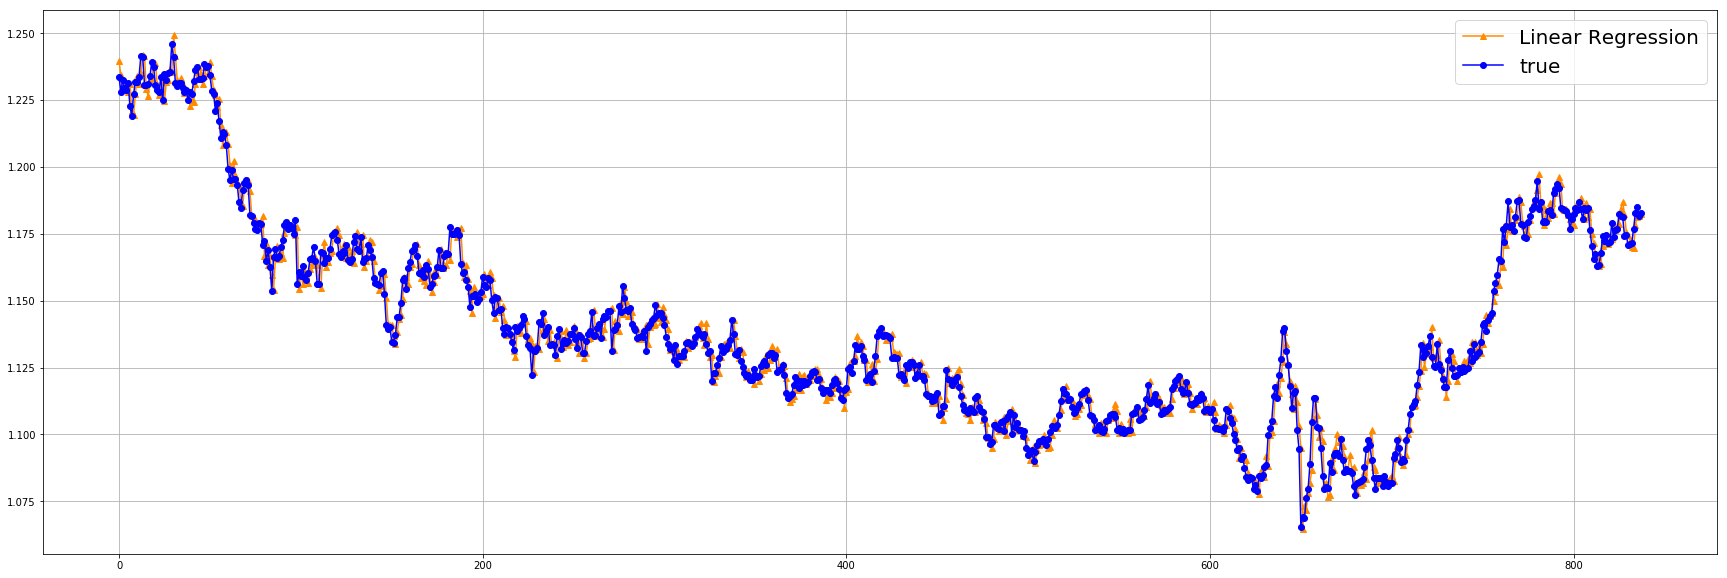

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Linear Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

## Degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
transform = PolynomialFeatures(2)
train_X2, test_X2 = transform.fit_transform(train_X), transform.fit_transform(test_X)
predictedPrices = lr.fit(train_X2, train_Y).predict(test_X2)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Linear Regression - Polynomial Features (Degree 2)')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

## Degree 3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
transform = PolynomialFeatures(3)
train_X2, test_X2 = transform.fit_transform(train_X), transform.fit_transform(test_X)
predictedPrices = lr.fit(train_X2, train_Y).predict(test_X2)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Linear Regression - Polynomial Features (Degree 3)')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

# Random Forest Regression

## Data Generation

In [1]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [2]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets

In [3]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [4]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

## Random Forest Regression Instance

In [7]:
from sklearn.ensemble import RandomForestRegressor
from Scripts.DTW import *
from Scripts.FastDTW import *
import json

with open("Models/ML/MLModels.json","r") as f:
    params = json.load(f)["Random Forest Regression"]["EURUSD"]
#rfg = RandomForestRegressor(**params)
rfg = RandomForestRegressor(n_estimators = 5000)
predictedPrices = rfg.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

MSE: 7.257482e-06
CORR: 0.997
DTW: 1.175
DTW: 1.164


In [9]:
import pickle
from Scripts.DTW import *
from Scripts.FastDTW import *

filename = "Models/ML/RandomForestRegression_EURUSD.sav.tar"
!tar -zxvf $filename
filename = "RandomForestRegression_EURUSD.sav"
rfg = pickle.load(open(filename, 'rb'))
predictedPrices = rfg.predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

RandomForestRegression_EURUSD.sav
MSE: 7.324721e-06
CORR: 0.997
DTW: 1.180
DTW: 1.164


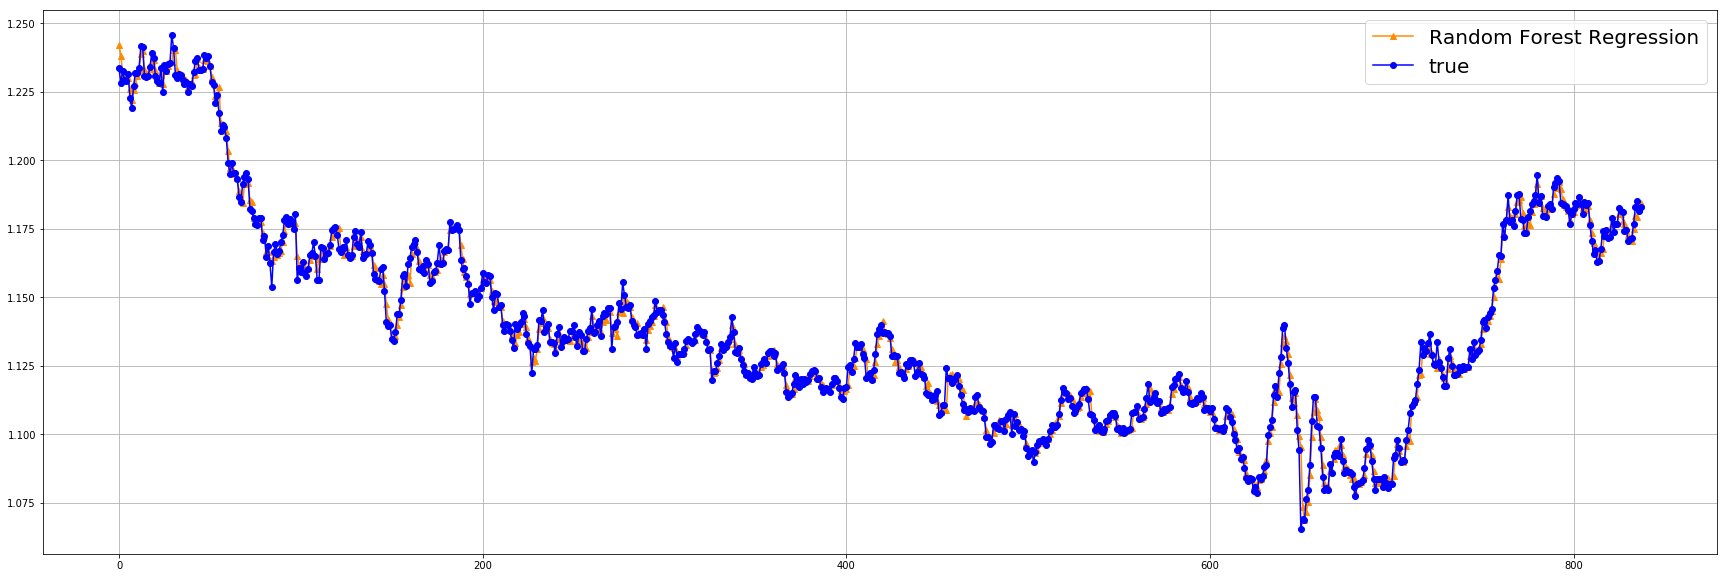

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Random Forest Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

In [18]:
features_importances = rfg.feature_importances_
impurityFeatures = [(name,sum(features_importances[i::28])) for name,i in zip(df.columns,range(28))]
impurityFeatures.sort(key = lambda x: x[1], reverse = True)
print("Explained variance by the features:\n")
print("\n".join([elem[0]+" "+str(elem[1]) for elem in impurityFeatures]))

Explained variance by the features:

HMA6 0.45827692600227493
WMA6 0.3407039013731481
HMA20 0.11568451140127303
EMA6 0.07828758855329648
SMA6 0.003841821257471871
Yield 0.0007897554478891176
ROC 0.00035414902165521446
PercentageVolume 0.0003527901568823744
Stochastic Oscillator 0.00030151460925158805
RSI 0.00025750134303338456
CCI 0.0002534290376500429
KST 0.00016722562981524538
PPO 0.00010383871577528955
MACD 9.949705403719112e-05
HMA50 9.822468838862236e-05
EMA100 6.394381827438782e-05
HMA100 5.6175474005593406e-05
SMA100 4.292523008215316e-05
WMA20 3.487696337961465e-05
EMA20 3.393630385193874e-05
WMA100 2.969103929635595e-05
SMA50 2.8982577336061795e-05
EMA50 2.7017111186636628e-05
WMA50 2.4259903169196843e-05
SMA20 2.4044980212980173e-05
BOLM 2.0966394751937893e-05
BOLU 2.0445791702487502e-05
BOLD 2.0060120908706825e-05


# Bayesian Ridge Regression

## Data Generation

In [36]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [37]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets

In [38]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [39]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

## Bayesian Ridge Regression Instance

In [40]:
from sklearn.linear_model import BayesianRidge
from Scripts.DTW import *
from Scripts.FastDTW import *
import json

with open("Models/ML/MLModels.json","r") as f:
    params = json.load(f)["Bayesian Ridge Regression"]["EURUSD"]
brr = BayesianRidge(**params)
predictedPrices = brr.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

MSE: 2.005727e-05
CORR: 0.993
DTW: 0.901
DTW: 0.888


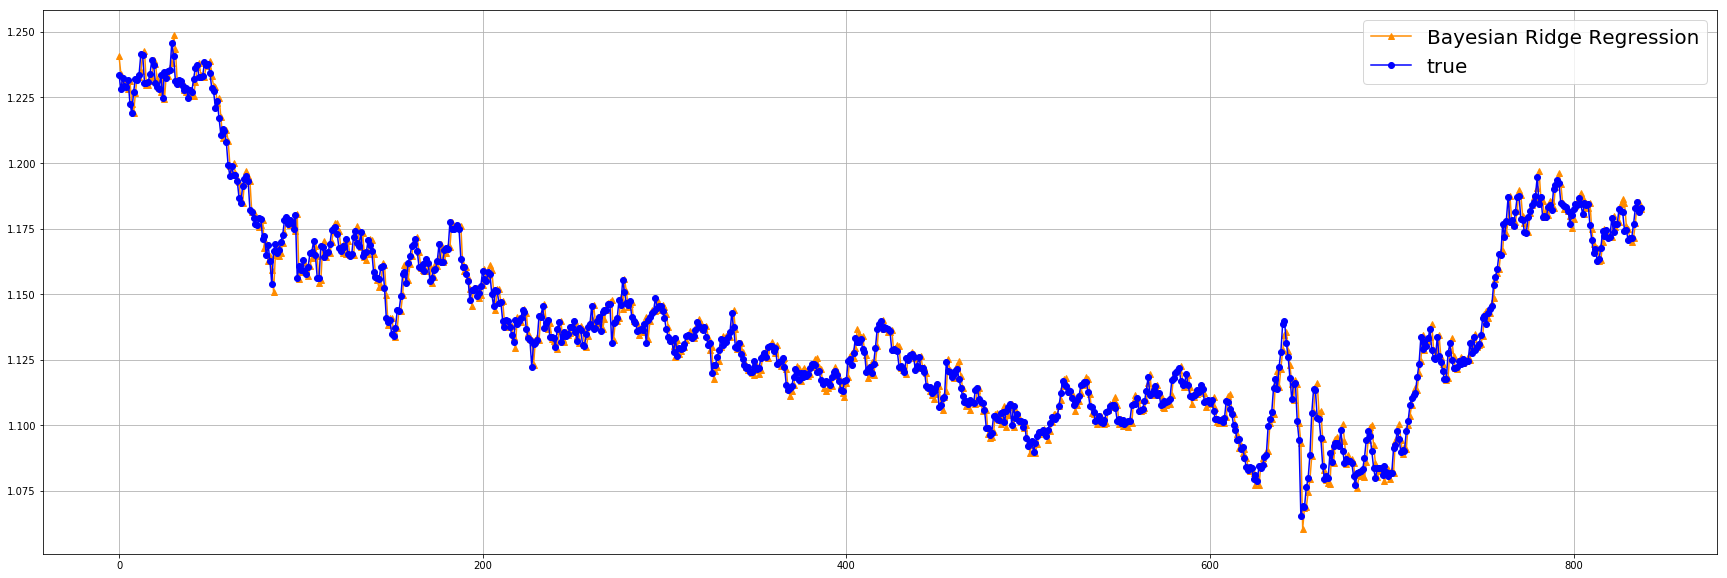

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'Bayesian Ridge Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

# K-Nearest Neighbours Regression

## Data Generation

In [43]:
from Scripts.utils import *  
import pandas as pd

columns = ['Date','Open','High','Low','Close','Volume','Yield','PercentageVolume',
           'SMA6','EMA6','WMA6','HMA6','SMA20','EMA20','WMA20','HMA20','SMA50','EMA50','WMA50','HMA50',
           'SMA100','EMA100','WMA100','HMA100','MACD','CCI','Stochastic Oscillator','RSI','ROC','PPO',
           'KST','BOLU','BOLD','BOLM']
data = pd.read_csv('DataReady/EURUSD/EURUSD_D1.csv', names = columns, header = 0)
toRemove = ['Volume', 'Date','High','Low','Open','Close']
df = selectData(data,toRemove)

In [44]:
closingPrices = data['Close']
closingPrices = closingPrices.reset_index(drop=True)
normDf = normalizeData(df)
images = generateImages(normDf)
images = np.array(images)

## Training and Test Datasets

In [45]:
from sklearn.model_selection import train_test_split
train_X, _, train_Y, _ = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = True, random_state = 42)
_, test_X, _, test_Y = train_test_split(images, closingPrices[28:], test_size = 0.2,shuffle = False)

In [46]:
train_X = train_X.reshape(train_X.shape[0],28*28).astype(np.float32)
test_X = test_X.reshape(test_X.shape[0],28*28).astype(np.float32)

## KNN Regressor Instance

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from Scripts.DTW import *
from Scripts.FastDTW import *
import json

with open("Models/ML/MLModels.json","r") as f:
    params = json.load(f)["KNN Regression"]["EURUSD"]
knn = KNeighborsRegressor(**params)
predictedPrices = knn.fit(train_X, train_Y).predict(test_X)
print("MSE: {:e}".format(np.mean((predictedPrices-test_Y)**2)))
print("CORR: {:.3f}".format(np.corrcoef(predictedPrices, test_Y)[0,1]))
print("DTW: {:.3f}".format(DTW(predictedPrices, np.array(test_Y),1)))
print("DTW: {:.3f}".format(fastdtw(predictedPrices, np.array(test_Y),1)[0]))

MSE: 1.587217e-05
CORR: 0.995
DTW: 0.921
DTW: 0.909


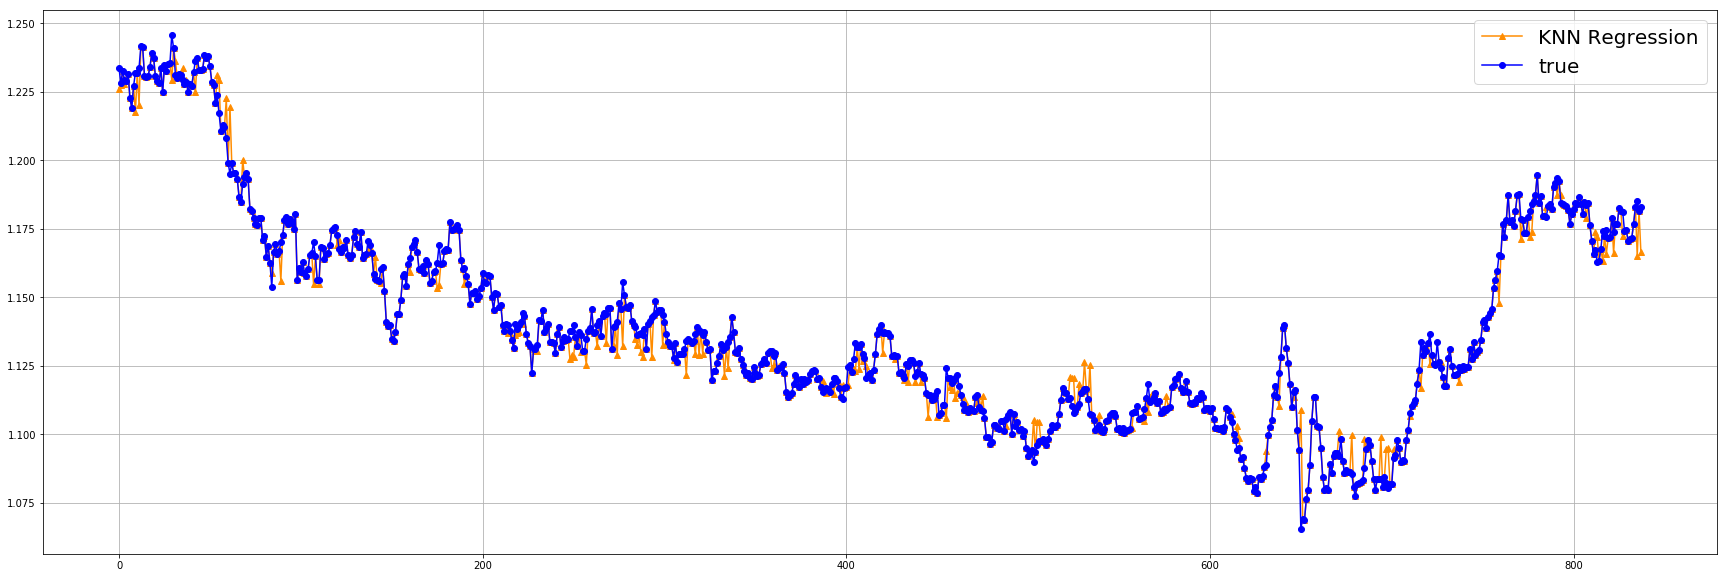

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(range(len(predictedPrices)),predictedPrices, color='darkorange', marker='^',label = 'KNN Regression')
plt.plot(range(len(test_Y)),test_Y, color='blue', marker='o', label = 'true')
plt.legend(fontsize=20)
plt.show()

# Trading Strategy

<p> The trading strategy consists in completely automating the procedures to enter the market. The main idea behind is that at each time $t$ for which the true value and the previously predicted are known, the next unknown predicted value at $t+1$ is considered. The strategy then checks if it the current predicted price $\tilde{p}(t)$ represents a local minimum (i.e. $\tilde{p}(t-1)>\tilde{p}(t) ~\&~ \tilde{p}(t)<\tilde{p}(t+1)$) or maximum (i.e. $\tilde{p}(t-1)<\tilde{p}(t) ~\&~ \tilde{p}(t)>\tilde{p}(t+1)$ ) to then enter the market with a <strong>BUY</strong> or a <strong>SELL</strong> position, respectively.</p>
<p>By opening a position, of course, the real price is considered as the entry price. A <strong>TAKE PROFIT</strong> threshold is set by considering the predicted variation at time $t+1$. A <strong>STOP LOSS</strong> threshold is set too by using the $risk\_factor$ parameter (e.g. a $risk\_factor=5$ would consist in setting the STOP LOSS at one-fifth of the variation considered for the TAKE PROFIT, in the opposite direction: in this way a profit event would cover up to 5 losses). Also in these cases, the TAKE PROFIT and STOP LOSS values are referred to the real trend.</p>
<p>The trading strategy then defines a $budget$ value as the initial capitalization and a $margin_call$ value which indicates the safety percentage of the budget under which either the strategy is stopped or the most lossy investmenet is closed, in order to not accumulate too many losses in the same session. Finally, a $leverage$ parameter is used to give a real connotation to the strategy, by determining the quantities a trader could aim to invest even with a restricted budget.</p>
<p>In order to determine the most correct quantity to be invested, before each possible investment a $maximumLot$ measure is evaluated according to:
    \begin{equation}
    maximumLot = \mathrm{max}\Bigg(0,leverage\frac{\Big(\frac{budget\cdot margin\_call}{100}-busyMargin\Big)}{10^5}\Bigg)
    \end{equation}
where $busyMargin$ represents the actual capitalization occupied by all the open transactions. Then, the $lot$ measure to be invested is randomly evaluated according to: $lot \sim \mathrm{Uniform}(0, maximumLot)$.</p>
<p>Finally the trading strategy accepts a $smooth\_factor \in (0,1]$ parameter, which determines how much confidence the trader wants to give to the predictions of the models. By choosing a low $smooth\_factor$ the trader would choose to prefer a more conservative approach, by smoothing the predictions of the variations and thus minimizing both profit and loss ranges.</p>

In [23]:
from Scripts.Trade import *                
close = np.array(test_Y)
high = np.array(data['High'])[-len(close):]
low = np.array(data['Low'])[-len(close):]
history = trade(close,high,low, predictedPrices,
         budget = 1000,
         smooth_factor = 0.5,
         risk_factor = 7,
         leverage = 100,
         margin_call = 30,
         verbose = False)

SETTINGS:
-Initial Budget: 1000
-Smoothing Factor (confidence):0.5
-Risk-Revenue Ratio: 1:7
-Leverage: 100x
-Safety Margin on Budget: 30%
STARTED WITH BUDGET: 1,000.00, ENDED WITH BUDGET: 993.86


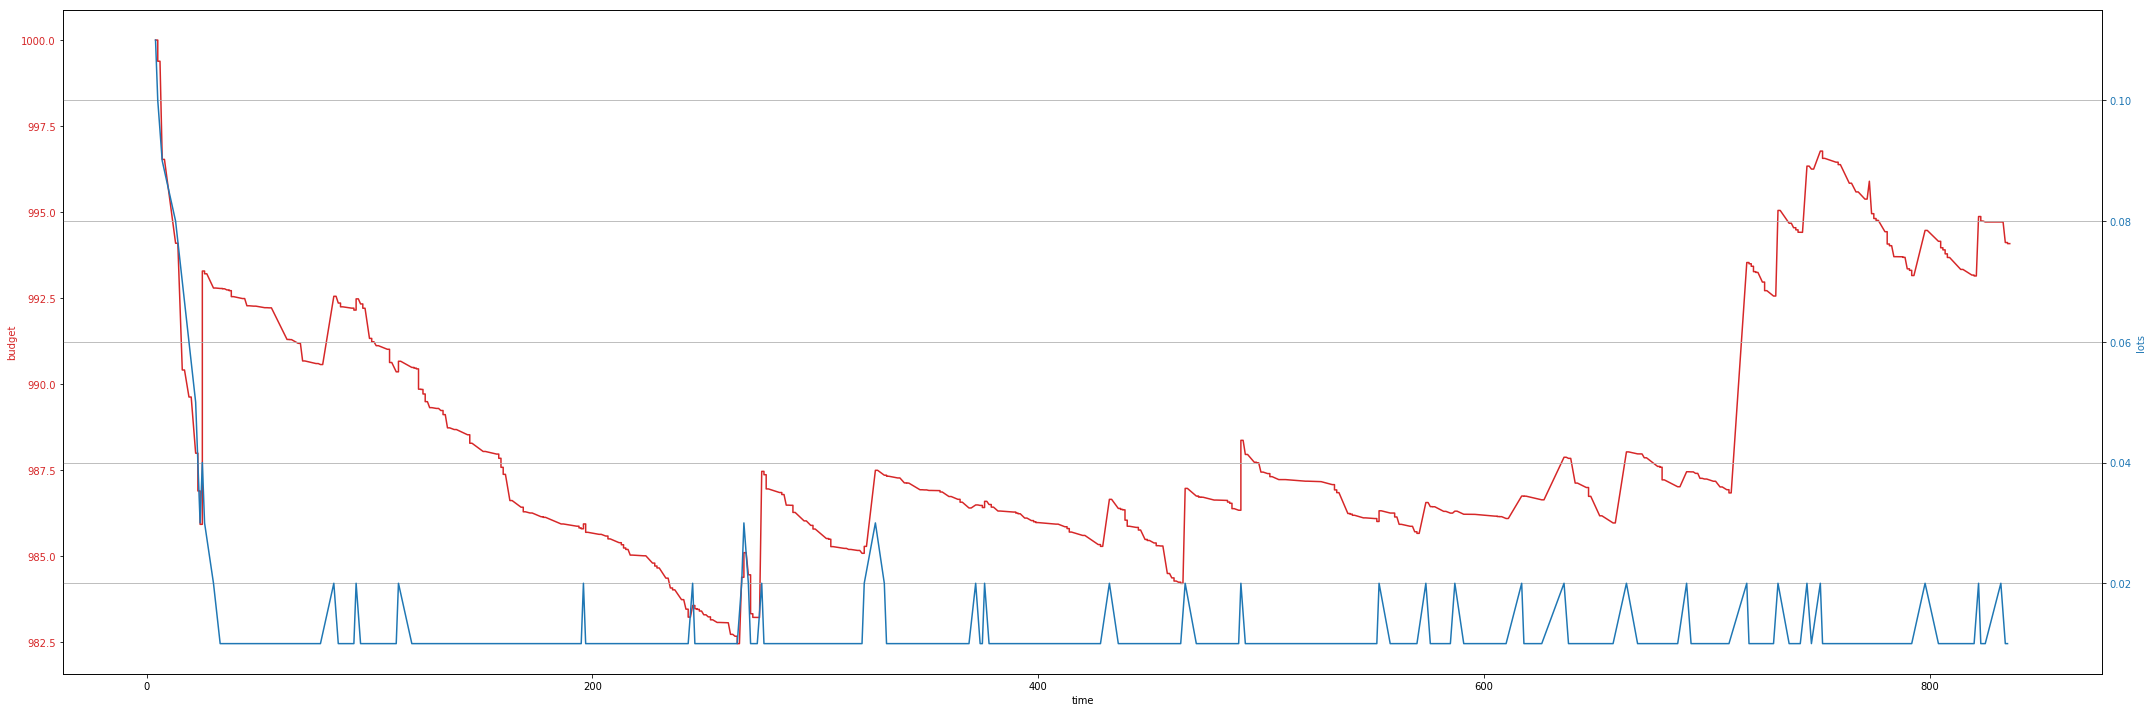

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(30,10))
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('budget', color=color)
ax1.plot(history["time"], history["budget"], color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('lots', color=color)  # we already handled the x-label with ax1
ax2.plot(history["time_lots"], history["lots"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()